In [1]:
from ITMO.knn.main import *

In [139]:
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib notebook

In [12]:
from ITMO.util import read_csv
table = read_csv('ITMO/knn/dataset.txt', '\t')
all_samples = make_dataset(table)

In [13]:
def weighted_mean(samples, n_classes):
    pass

<IPython.core.display.Javascript object>


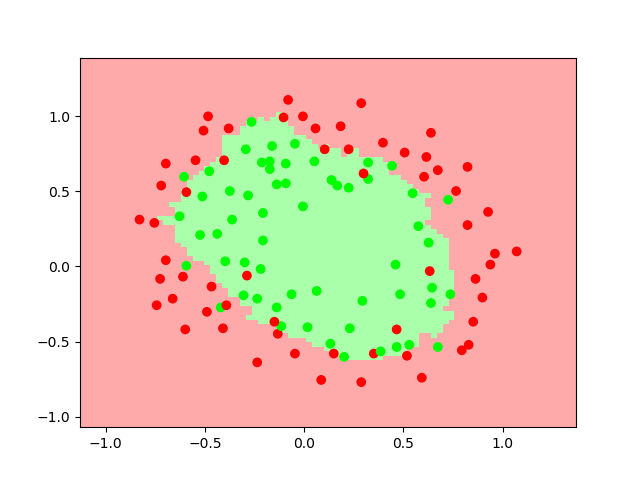

In [144]:
plt.scatter([sample.coords[0] for sample in all_samples], 
            [sample.coords[1] for sample in all_samples], 
            c=[sample.label for sample in all_samples])

0.0547789084746
0.183101559322


<IPython.core.display.Javascript object>


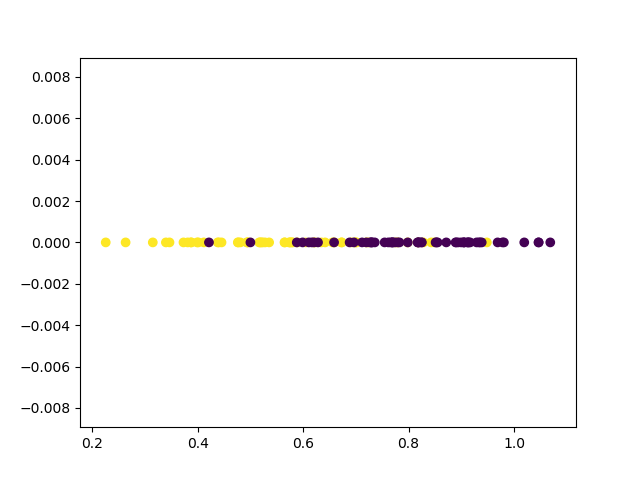

In [15]:
polar_samples = []
polar_samples = copy.deepcopy(all_samples)
x_mean = 0
y_mean = 0
x_mean = np.mean([polar_samples[i].coords[0] for i in range(len(polar_samples))])
y_mean = np.mean([polar_samples[i].coords[1] for i in range(len(polar_samples))])
print(x_mean)
print(y_mean)
for sample in polar_samples:
    sample.coords[0] = sample.coords[0] - x_mean
    sample.coords[1] = sample.coords[1] - y_mean
    sample.coords[0] = np.sqrt(pow(sample.coords[0],2)+pow(sample.coords[1],2))
    sample.coords[1] = 0
plt.scatter([sample.coords[0] for sample in polar_samples], [sample.coords[1] for sample in polar_samples], c=[sample.label for sample in polar_samples])
plt.show()

In [16]:
def count_parabolic(t=1,u=1, power=2):
    parabolic_samples = []
    parabolic_samples = copy.deepcopy(all_samples)
    x_mean = 0
    y_mean = 0
    x_mean = np.mean([parabolic_samples[i].coords[0] for i in range(len(parabolic_samples))])
    y_mean = np.mean([parabolic_samples[i].coords[1] for i in range(len(parabolic_samples))])
#     print(x_mean)
#     print(y_mean)

    for sample in parabolic_samples:
        sample.coords[0] = sample.coords[0] - x_mean
        sample.coords[1] = sample.coords[1] - y_mean
        sample.coords.append(t*pow(sample.coords[0],power)+u*pow(sample.coords[1],power))
    return (parabolic_samples)


<IPython.core.display.Javascript object>


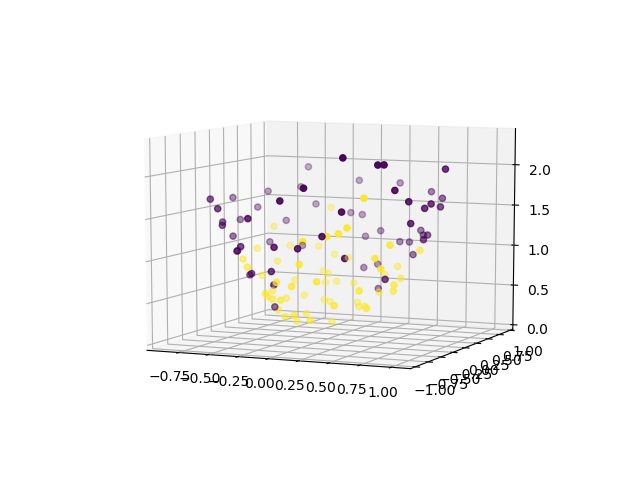

In [30]:
parabolic_samples = count_parabolic(t=2,u=2,power=2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([sample.coords[0] for sample in parabolic_samples], [sample.coords[1] for sample in parabolic_samples],
           [sample.coords[2] for sample in parabolic_samples], c=[sample.label for sample in parabolic_samples])    

In [18]:
def count_bicentral(samples, bic_a, mean=False):
    coords = []
    bicentral_samples = []
    means = [0 for b in samples[0].coords]
    if mean:
        for idx in range(len(means)):
            means[idx] = np.mean([samples[i].coords[idx] for i in range(len(samples))])
            for sample in samples:
                sample.coords[idx] -= means[idx]
    for sample in samples:
        bicentral_samples.append(Point(sample.label,[np.sqrt(sum([pow(coord - bic_a,2) for coord in sample.coords])), 
                                                   np.sqrt(sum([pow(coord + bic_a,2) for coord in sample.coords]))]))
    return bicentral_samples
    

<IPython.core.display.Javascript object>


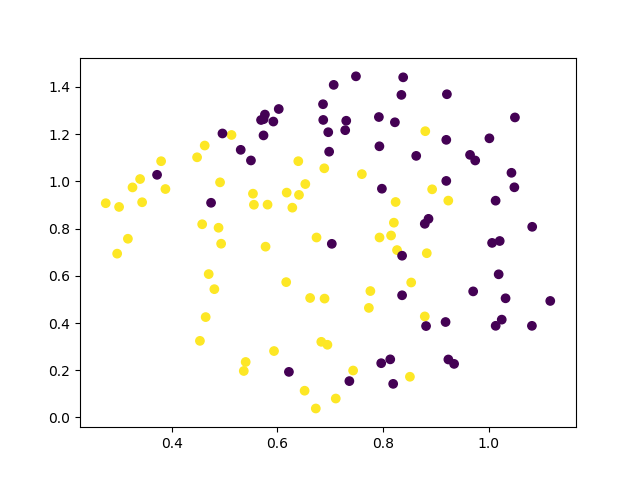

In [19]:
bic_samples = copy.deepcopy(all_samples)

bicentral_samples = count_bicentral(bic_samples, 0.25, mean = False)
plt.scatter([sample.coords[0] for sample in bicentral_samples], [sample.coords[1] for sample in bicentral_samples], c=[sample.label for sample in bicentral_samples])
plt.show()

In [16]:
DISTANCE_METRIC = distances.euclidean
random.seed(42)
for N_NEIGHBORS in range(1,16):
    classifier = WeightedKNNClassifier(N_NEIGHBORS, DISTANCE_METRIC, KERNEL)
    misses = []
    misses.append(leave_one_out_validation(all_samples, classifier, 2))
    misses.append(leave_one_out_validation(polar_samples, classifier, 2))
    misses.append(leave_one_out_validation(parabolic_samples, classifier, 2))
    misses.append(leave_one_out_validation(bicentral_samples, classifier, 2))
    print('{0}:{1}'.format(N_NEIGHBORS, misses))

1:[45, 35, 33, 30]
2:[33, 28, 29, 27]
3:[31, 30, 29, 25]
4:[31, 22, 26, 22]
5:[29, 24, 28, 25]
6:[31, 23, 25, 25]
7:[32, 23, 24, 22]
8:[29, 25, 26, 21]
9:[30, 24, 24, 20]
10:[35, 24, 25, 21]
11:[31, 25, 24, 20]
12:[37, 25, 26, 23]
13:[30, 23, 25, 21]
14:[35, 24, 26, 21]
15:[30, 24, 24, 21]


In [53]:
DISTANCE_METRIC = distances.euclidean
KERNEL = kernels.sigmoid
FOLD = 5
random.seed(7)
for N_NEIGHBORS in range(1,16):
    classifier = WeightedKNNClassifier(N_NEIGHBORS, DISTANCE_METRIC, KERNEL)
    misses = []
    misses.append(k_fold_cross_validation(all_samples, classifier, n_classes=2, k_fold=FOLD,
                                accuracy_measure=Metrics.f_score))
    misses.append(k_fold_cross_validation(polar_samples, classifier, n_classes=2, k_fold=FOLD,
                                accuracy_measure=Metrics.f_score))
    misses.append(k_fold_cross_validation(parabolic_samples, classifier, n_classes=2, k_fold=FOLD,
                                accuracy_measure=Metrics.f_score))
    misses.append(k_fold_cross_validation(bicentral_samples, classifier, n_classes=2, k_fold=FOLD,
                                accuracy_measure=Metrics.f_score))
    print('{0}:{1} {2}'.format(N_NEIGHBORS, misses, max(misses)))

1:[0.6469199352127388, 0.7250406866038162, 0.7135298698713034, 0.702411122541655] 0.7250406866038162
2:[0.7184409164380714, 0.7916044637021987, 0.7086294869787577, 0.780626884055702] 0.7916044637021987
3:[0.7231566430953148, 0.7566859203393683, 0.7378024505105103, 0.7619708410712851] 0.7619708410712851
4:[0.683476303226498, 0.7671609360354685, 0.7993962428535422, 0.7722521668248673] 0.7993962428535422
5:[0.7456941875535336, 0.7954749772145774, 0.7823270355671477, 0.8051159741988348] 0.8051159741988348
6:[0.7161913071543495, 0.7935286133729735, 0.7804852660471959, 0.8129060110413423] 0.8129060110413423
7:[0.7411675875977123, 0.7993864474671823, 0.8185243788469595, 0.7799269497117163] 0.8185243788469595
8:[0.7153031171502661, 0.7817179885261488, 0.7667323813794793, 0.8066797710077516] 0.8066797710077516
9:[0.7164561847821243, 0.8232440555603757, 0.7790690020820888, 0.8091410028679361] 0.8232440555603757
10:[0.6454265534092684, 0.7799519057238036, 0.7731801690197521, 0.8006694445225907] 0

In [168]:
def show_mesh(train_data):
    def gen_mesh(traint_data):
        x_min = min([point.coords[0] for point in train_data]) - 0.3
        x_max = max([point.coords[0] for point in train_data]) + 0.3
        y_min = min([point.coords[1] for point in train_data]) - 0.3
        y_max = max([point.coords[1] for point in train_data]) + 0.3
        
        h = 0.03
        test_x, test_y = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        return [test_x, test_y]
    
    test_mesh = gen_mesh(train_data)
    test_points = [Point(random.randint(0, 1), [coords[0], coords[1]]) 
                   for coords in zip(test_mesh[0].ravel(), test_mesh[1].ravel())]
    
    all_samples = train_data
#     all_samples = count_bicentral(train_data, 0.25)
#     test_points = count_bicentral(test_points, 0.25)
    
    classifier = WeightedKNNClassifier(N_NEIGHBORS, DISTANCE_METRIC, KERNEL)
    classifier.fit(all_samples, n_classes=2)
    predicted_mesh = classifier.test_dataset(test_points)
    
    classColormap = ListedColormap(['#FF0000', '#00FF00'])
    testColormap = ListedColormap(['#FFAAAA', '#AAFFAA'])
    
    plt.pcolormesh(test_mesh[0],
                   test_mesh[1],
                   np.asarray([sample.label for sample in predicted_mesh]).reshape(test_mesh[0].shape),
                   cmap=testColormap)
    
    plt.scatter([sample.coords[0] for sample in train_data], 
                [sample.coords[1] for sample in train_data], 
                c=[sample.label for sample in train_data],
                cmap=classColormap)
    plt.show()

<IPython.core.display.Javascript object>


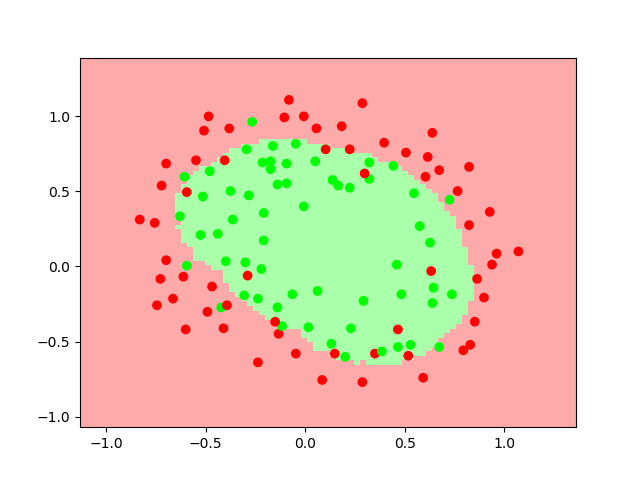

In [167]:
show_mesh(all_samples)

<IPython.core.display.Javascript object>


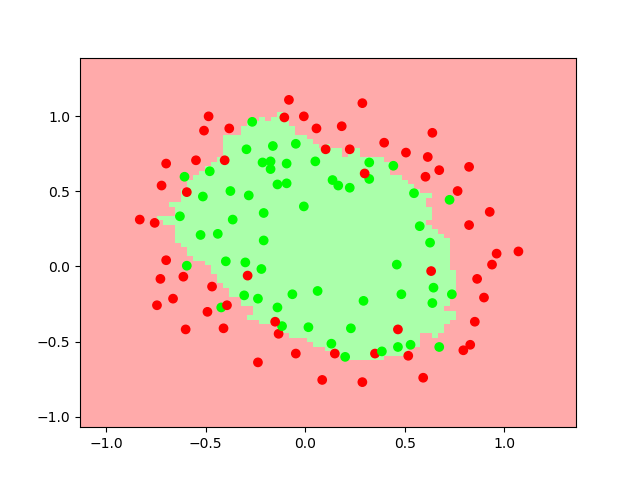

In [169]:
show_mesh(all_samples)